# Plot Graphs of Losses

### Imports

In [1]:
import wandb
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 4)
plt.rcParams["figure.dpi"] = 100
%matplotlib inline

## Setup

In [2]:
api = wandb.Api()
run = api.run("nostripegan/NoStripesGAN/f88dce84")
data = run.history(pandas=False)

losses_D = [d['Loss_D'] for d in data]
losses_G = [d['Loss_G'] for d in data]

## Graphs

### Generator vs Discriminator Loss

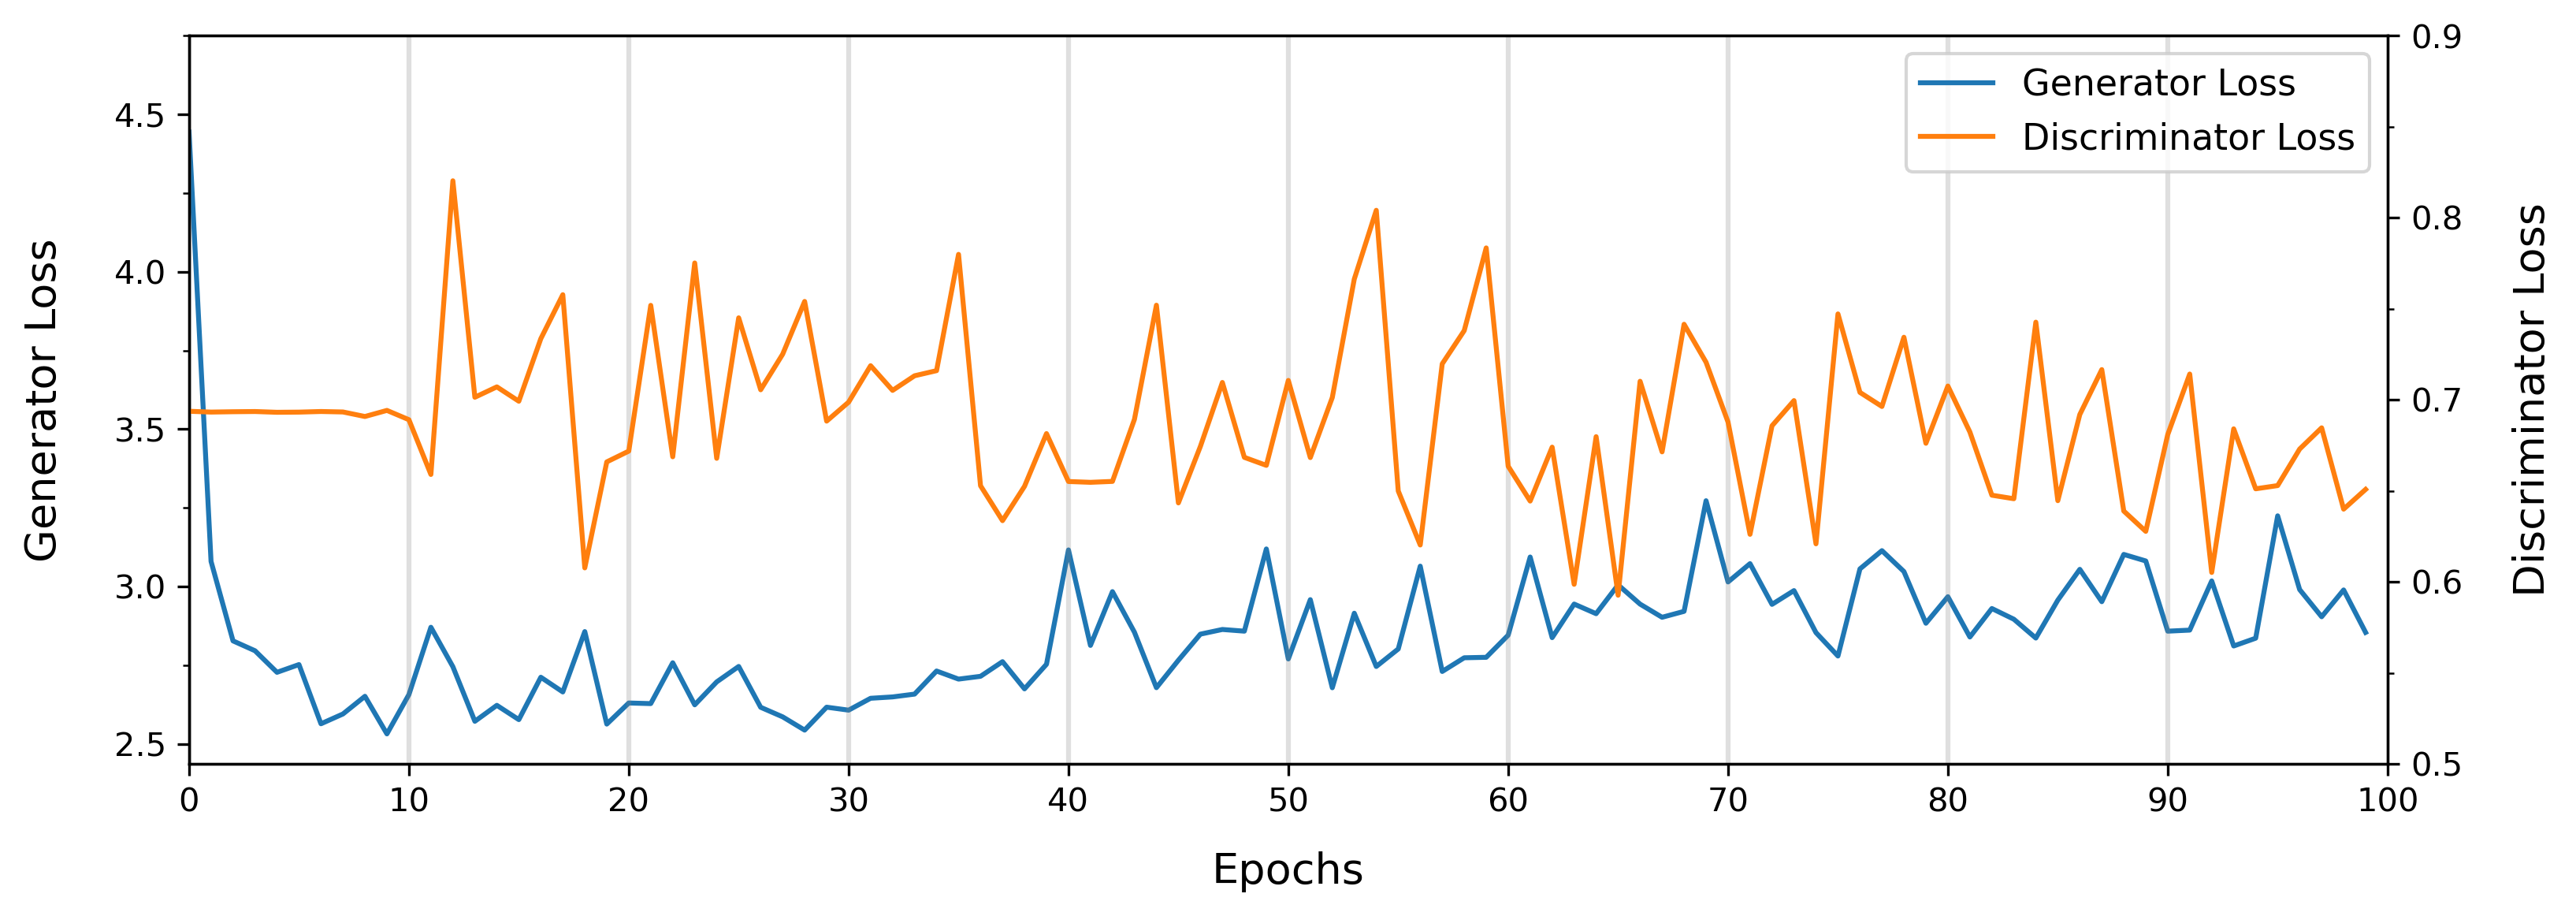

In [3]:
fig, ax1 = plt.subplots(figsize=(12, 4), dpi=300)

ax1.plot(losses_G, color='tab:blue', label='Generator Loss')
ax1.set_xlabel('Epochs', fontsize=13, labelpad=10)
ax1.set_xlim(0, 100)
ax1.set_xticks(np.linspace(0, 100, 11))
ax1.set_yticks(np.arange(2.5, 5, 0.5), minor=False)
ax1.set_yticks(np.arange(2.75, 5, 0.5), minor=True)
ax1.set_ylabel('Generator Loss', fontsize=13, labelpad=15)


ax2 = ax1.twinx()
ax2.plot(losses_D, color='tab:orange', label='Discriminator Loss')
ax2.set_ylabel('Discriminator Loss', fontsize=13, labelpad=15)
ax2.set_yticks(np.arange(0.5, 0.95, 0.1))
ax2.set_yticks(np.arange(0.5, 0.95, 0.05), minor=True)

for ax in [ax1, ax2]:
    ax.spines['left'].set_position(('data', 0))
    ax.spines['right'].set_position(('data', 100))
    ax.spines['top'].set_visible(True)
    
fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.88), fontsize=11)

for i in range(0, 100, 10):
    ax1.axvline(x=i, color='grey', alpha=0.25)

### Generator vs Discriminator Loss (200 Epochs)

In [4]:
epoch200 = api.run("nostripegan/NoStripesGAN/zowft8f4")
data200 = epoch200.history(pandas=False)

losses_D_200 = losses_D + [d['Loss_D'] for d in data200]
losses_G_200 = losses_G + [d['Loss_G'] for d in data200]

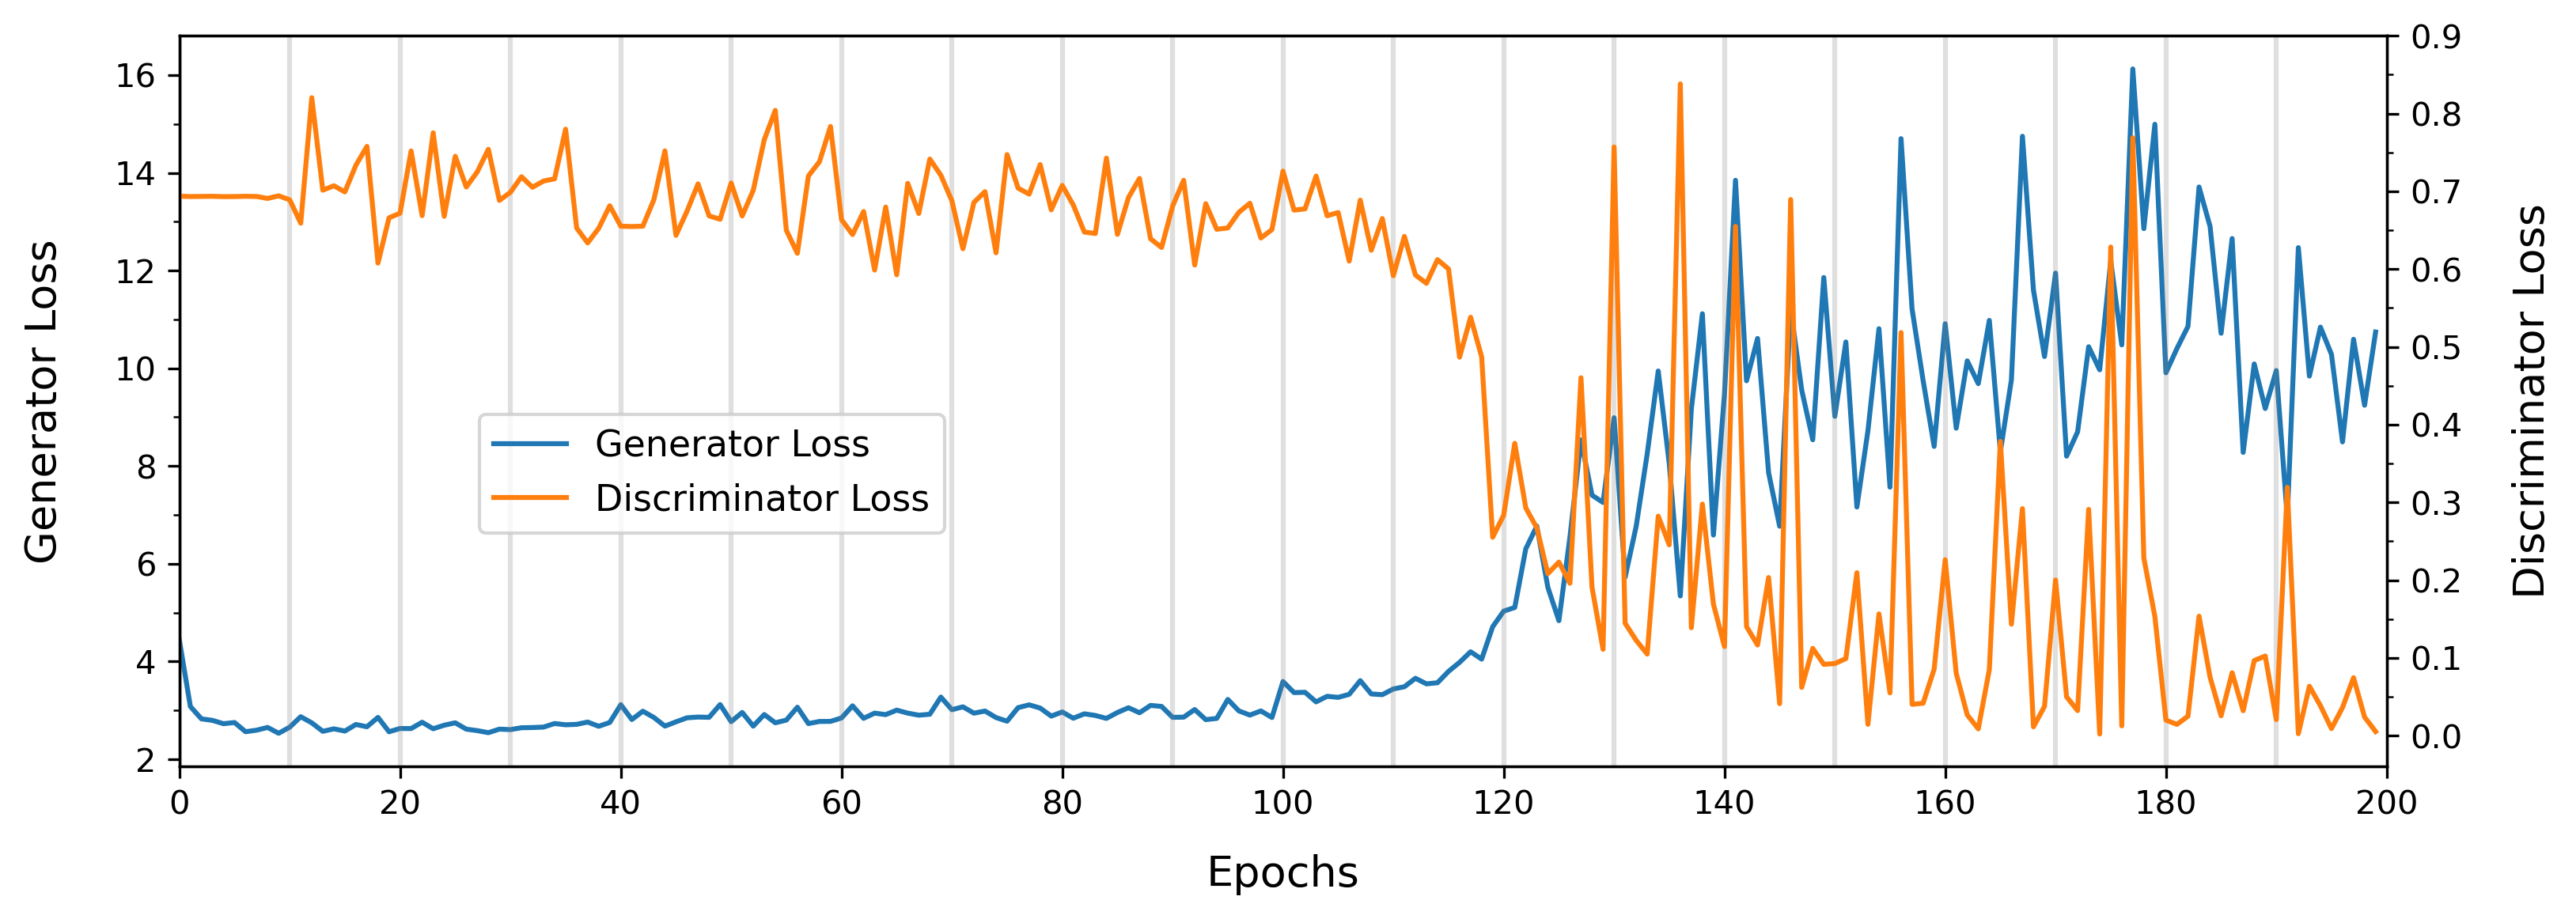

In [5]:
fig, ax1 = plt.subplots(figsize=(12, 4), dpi=300)

ax1.plot(losses_G_200, color='tab:blue', label='Generator Loss')
ax1.set_xlabel('Epochs', fontsize=13, labelpad=10)
ax1.set_xlim(0, 100)
ax1.set_xticks(np.linspace(0, 200, 11))
ax1.set_yticks(np.arange(2, 17, 2), minor=False)
ax1.set_yticks(np.arange(2, 17, 1), minor=True)
ax1.set_ylabel('Generator Loss', fontsize=13, labelpad=15)


ax2 = ax1.twinx()
ax2.plot(losses_D_200, color='tab:orange', label='Discriminator Loss')
ax2.set_ylabel('Discriminator Loss', fontsize=13, labelpad=15)
ax2.set_yticks(np.arange(0, 0.95, 0.1))
ax2.set_yticks(np.arange(0, 0.95, 0.05), minor=True)

for ax in [ax1, ax2]:
    ax.spines['left'].set_position(('data', 0))
    ax.spines['right'].set_position(('data', 200))
    ax.spines['top'].set_visible(True)
    
fig.legend(loc='upper right', bbox_to_anchor=(0.4, 0.5), fontsize=11)

for i in range(0, 200, 10):
    ax1.axvline(x=i, color='grey', alpha=0.25)